# USA Economic Uncertanty Map Template


---

By: João Pedro M. Silva - Federal University of Pernambuco (UFPE)

Email: joao.mirandasilva@ufpe.br



In [44]:
#Imports
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
import numpy as np
import mapclassify
import geopandas as gpd
import pyproj
import plotly.express as px

In [45]:
#Upload shapefile
shapefile_path = "/content/States_shapefile-shp.zip"
map_df = gpd.read_file(shapefile_path)

#Data
Dados = pd.read_excel("/content/incerteza_estados_eua.xlsx")

#Merging Datasets
merged = map_df.set_index('State_Code').join(Dados.set_index('States'))

In [46]:
#Checking the Data
merged.head()

,FID,Program,State_Name,Flowing_St,FID_1,geometry,Mediana
State_Code,,,,,,,
AL,1,PERMIT TRACKING,ALABAMA,F,919,"POLYGON ((-85.07007 31.98070, -85.11515 31.907...",0.7711
AK,2,None,ALASKA,N,920,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824...",0.8577
AZ,3,AZURITE,ARIZONA,F,921,"POLYGON ((-114.52063 33.02771, -114.55909 33.0...",3.4574
AR,4,PDS,ARKANSAS,F,922,"POLYGON ((-94.46169 34.19677, -94.45262 34.508...",0.8427
CA,5,None,CALIFORNIA,N,923,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823...",0.8574


In [47]:
# Unconventional way to drop states outside continental USA and states that are to small to plot numbers onto them.
merged1 = merged.drop("AK")
merged2 = merged1.drop("HI")
merged3 = merged2.drop("MD")
merged4 = merged3.drop("NJ")
merged5 = merged4.drop("DE")
merged6 = merged5.drop("DC")
merged7 = merged6.drop("CT")
merged8 = merged7.drop("RI")

## Quantile Chloropleth Map

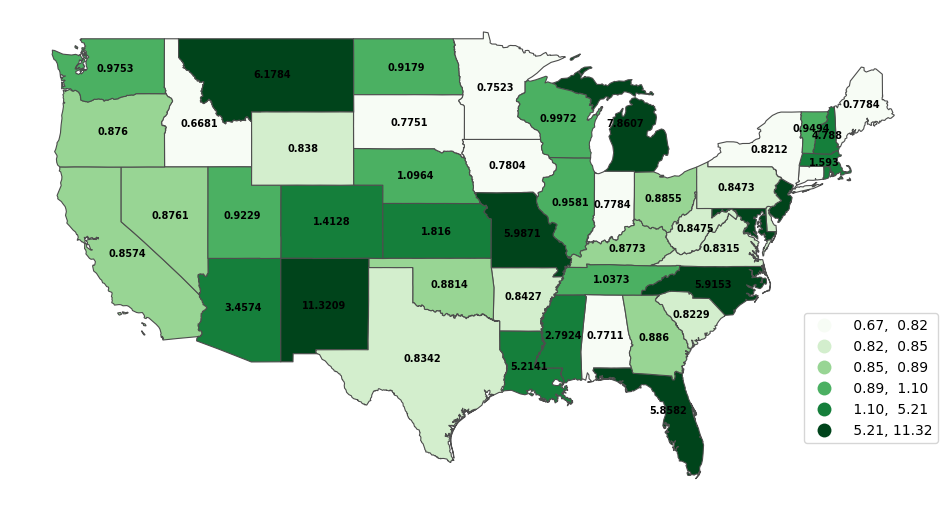

In [48]:
# Create a figure and axes objects
fig, ax = plt.subplots(figsize=(15, 15))

# Set the aspect ratio to maintain equal proportions
ax.set_aspect('equal')

# Create a divider for colormap placement
divider = make_axes_locatable(ax)

# Plot the chloropleth map using the "Mediana" column
merged2.plot(
    column="Mediana",
    scheme="QUANTILES",  # Divide data into quantiles for color mapping
    k=6,  # Use 6 quantiles for color coding
    cmap="Greens",  # Use the "Greens" colormap
    linewidth=0.8,  # Set line width for state boundaries
    edgecolor='0.3',  # Set line color for state boundaries
    legend=True,  # Display legend for color scheme
    legend_kwds={"loc": "center left", "bbox_to_anchor": (0.85, 0.25)},  # Position legend
    ax=ax  # Specify the target axes object
)

# Add data values to the center of each state
for idx, row in merged8.iterrows():
    lon, lat = row.geometry.centroid.xy  # Extract longitude and latitude coordinates
    lon = float(lon[0])  # Convert longitude to a float
    lat = float(lat[0])  # Convert latitude to a float

    # Add the data value as text to the center of each state
    ax.text(
        lon,
        lat,
        row.Mediana,  # Display the "Mediana" value
        ha="center",  # Horizontal alignment: center
        va="center",  # Vertical alignment: center
        fontsize=7,  # Font size
        fontweight="bold",  # Font weight: bold
        color="black"  # Text color: black
    )

# Turn off axis labels and ticks for a cleaner map appearance
ax.axis("off")

# Display the choropleth map
plt.show()

## Sequential Chloropleth Map

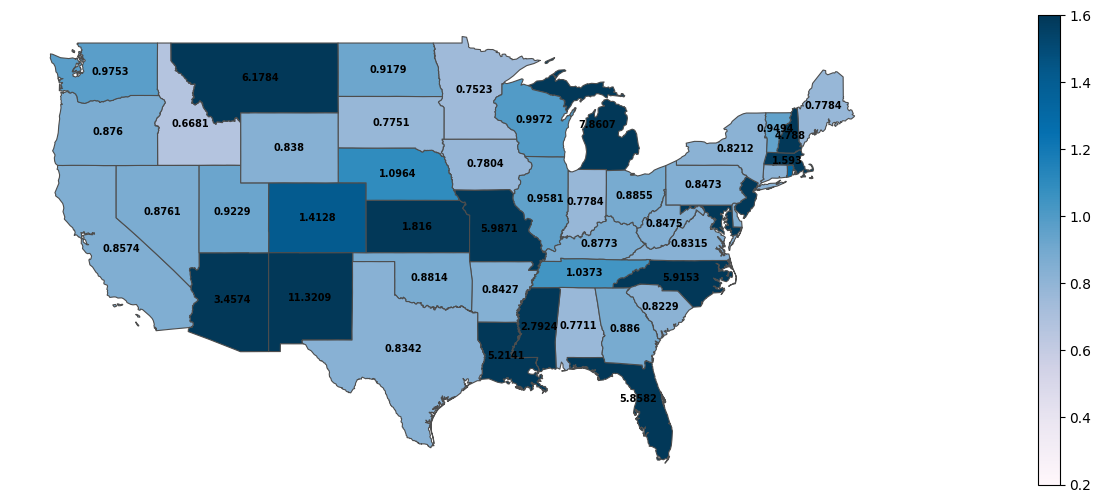

In [49]:
# Create a figure and axes objects
fig, ax = plt.subplots(figsize=(15, 15))

# Set the aspect ratio to maintain equal proportions
ax.set_aspect('equal')

# Create a divider for colormap placement
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.3)

#Plotting
merged2.plot(column='Mediana',
             cmap='PuBu',
             linewidth=0.8,
             ax=ax,
             edgecolor='0.3',
             legend=True, cax=cax,
             vmax=1.6, vmin=0.2, #Max and Min vertical scale values
             legend_kwds={ "orientation": "vertical"})

# Add data values to the center of each state
for idx, row in merged8.iterrows():
    lon, lat = row.geometry.centroid.xy
    lon = float(lon[0])
    lat = float(lat[0])
    ax.text(
        lon,
        lat,
        row.Mediana,
        ha="center",
        va="center",
        fontsize=7,
        fontweight="bold",
        color="black",
    )

# Turn off axis labels and ticks
ax.axis("off")

#plt.title('Mediana', fontweight="bold")
ax.axis('off')
plt.show()

In [50]:
#Saving the image
image_format = 'pdf' # e.g .png, .svg, etc.
image_name = 'uncertantiy_usa.pdf'

fig.savefig(image_name, format=image_format, dpi=1200)